In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
from IPython.display import display


In [2]:
read = pd.read_csv("BTC-USDT.csv")
train, test = read.iloc[:366,:4], read.iloc[366:,:4]
assert len(read) == len(train) + len(test), "data length mismatch"
display(read.head())


,date,close,high,low,open,quoteVolume,volume,weightedAverage
0,2017-02-04,1032.95,1040.000,1002.24,1015.872734,1550.464549,1.587073e+06,1023.611556
1,2017-02-05,1010.00,1034.000,999.00,1033.000000,1426.321885,1.448222e+06,1015.354568
2,2017-02-06,1021.20,1025.000,1007.30,1008.572620,550.637492,5.607512e+05,1018.367343
3,2017-02-07,1052.00,1055.294,1020.60,1022.699993,1056.148272,1.102652e+06,1044.030968
4,2017-02-08,1050.99,1069.070,1015.00,1052.000000,2055.268441,2.142753e+06,1042.566210


In [3]:
#Preprocessing
for df in [train, test]:
    df.columns=['ds', 'y', 'y_high', 'y_low']
    df['ds'] = pd.to_datetime(df['ds'])
    for col in ['y', 'y_high', 'y_low']:
        df[col] = (df[col] - df[col].shift(1)).fillna(0)
        df[col] = (df[col] - df[col].mean()) / (df[col].std())
#         df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min()) #min-max scaling

display(train.head(), test.head())


,ds,y,y_high,y_low
0,2017-02-04,-0.042032,-0.055448,-0.038170
1,2017-02-05,-0.091514,-0.070013,-0.044731
2,2017-02-06,-0.017884,-0.077296,-0.021360
3,2017-02-07,0.024375,0.018091,-0.011233
4,2017-02-08,-0.044210,-0.022007,-0.049511


,ds,y,y_high,y_low
366,2018-02-05,-0.307739,-0.281385,-0.371160
367,2018-02-06,1.184526,-1.405104,-1.851952
368,2018-02-07,-0.611663,1.519107,2.317126
369,2018-02-08,1.023581,-0.130740,0.462915
370,2018-02-09,0.536667,-0.168840,0.053578


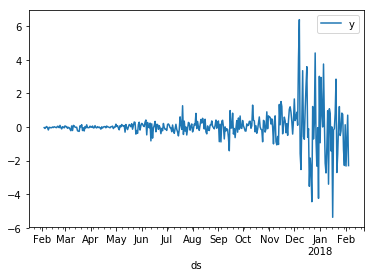

In [4]:
train.set_index('ds').plot(y='y')


In [5]:
model = Prophet()
model.fit(train)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/data-x/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
391,2018-03-02,-0.035211,-0.035233,-0.035191,-1.340466,1.258203,0.016653,0.016653,0.016653,0.016653,0.016653,0.016653,0.016653,0.016653,0.016653,-0.018559
392,2018-03-03,-0.035377,-0.035401,-0.035355,-1.233212,1.416431,0.098539,0.098539,0.098539,0.098539,0.098539,0.098539,0.098539,0.098539,0.098539,0.063162
393,2018-03-04,-0.035543,-0.035568,-0.035520,-1.471054,1.142345,-0.089051,-0.089051,-0.089051,-0.089051,-0.089051,-0.089051,-0.089051,-0.089051,-0.089051,-0.124594
394,2018-03-05,-0.035708,-0.035735,-0.035684,-1.326792,1.190680,0.010798,0.010798,0.010798,0.010798,0.010798,0.010798,0.010798,0.010798,0.010798,-0.024910
395,2018-03-06,-0.035874,-0.035902,-0.035848,-1.377902,1.100061,-0.109331,-0.109331,-0.109331,-0.109331,-0.109331,-0.109331,-0.109331,-0.109331,-0.109331,-0.145205


,ds,y,y_high,y_low
390,2018-03-01,0.892943,-0.266345,-0.486345
391,2018-03-02,-0.140818,0.001857,0.932652
392,2018-03-03,0.510186,0.586990,0.166035
393,2018-03-04,-0.191317,-0.261513,-0.232571
394,2018-03-05,-0.252132,-0.085509,0.410690


/anaconda3/envs/data-x/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


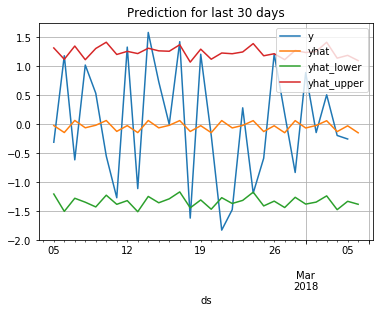

In [6]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

display(forecast.tail(), test.tail())

ax = test.plot(x='ds', y='y')
forecast.tail(30).plot(x='ds', y=['yhat','yhat_lower','yhat_upper'], ax=ax, grid=True, title="Prediction for last 30 days")


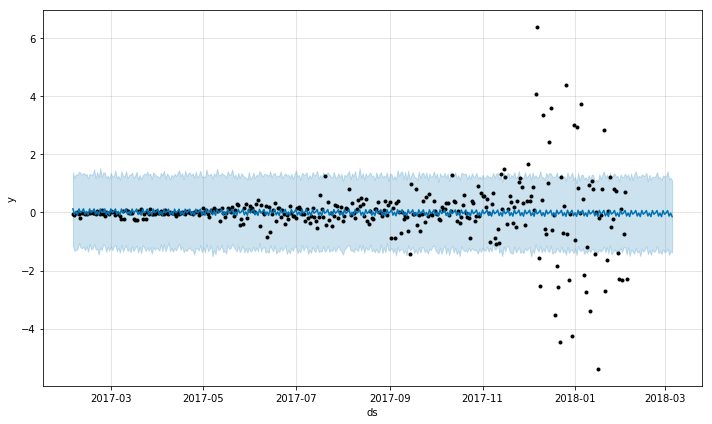

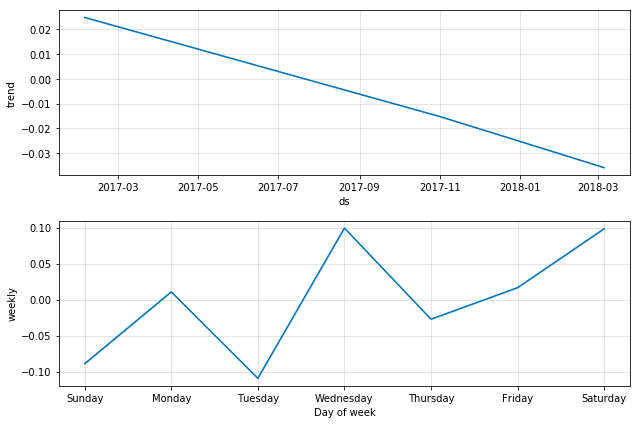

In [7]:
model.plot(forecast);
model.plot_components(forecast);
